# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [25]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

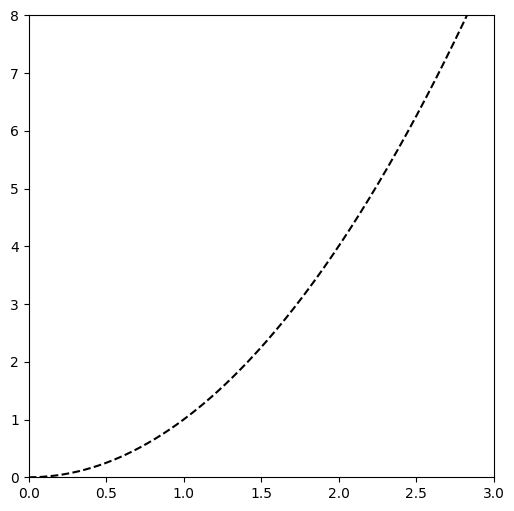

In [26]:
f = lambda x: (x ** 2)

x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6, 6));
axes = plt.gca()
axes.set_xlim([0, 3])
axes.set_ylim([0, 8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

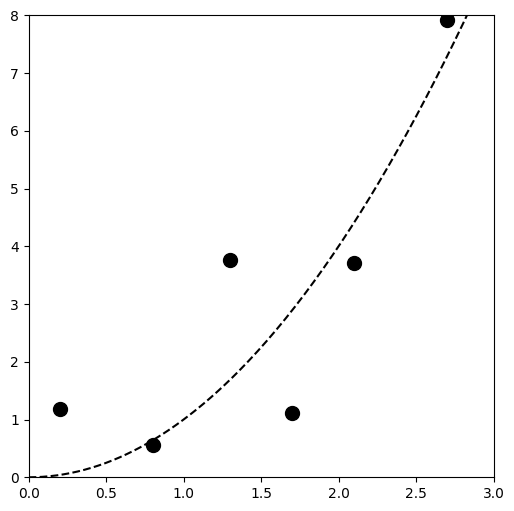

In [27]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6, 6));
axes = plt.gca()
axes.set_xlim([0, 3])
axes.set_ylim([0, 8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [28]:
lr = lm.LinearRegression()
lr.fit(x[:, np.newaxis], y);

print(lr.coef_)
print(lr.intercept_)

[2.72278521]
-1.2485241917729426


Definiujemy naszą funkcję regresji

In [29]:
f_lr = lambda x: lr.coef_ * x + lr.intercept_

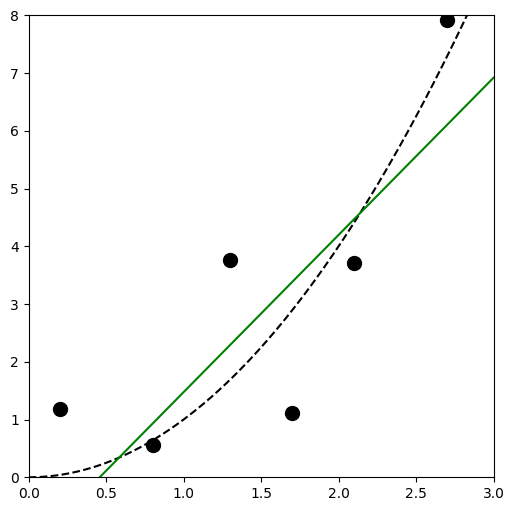

In [30]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6, 6));
axes = plt.gca()
axes.set_xlim([0, 3])
axes.set_ylim([0, 8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [31]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

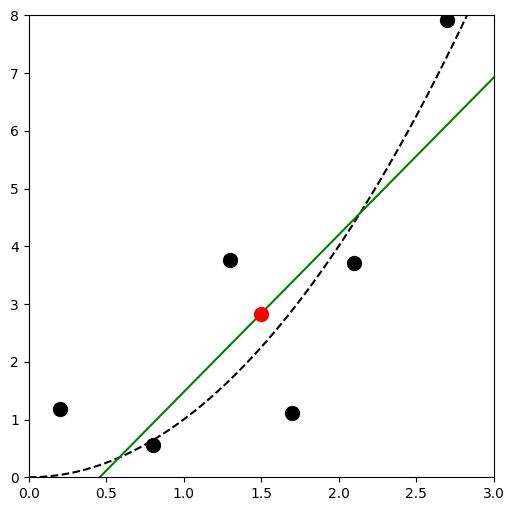

In [32]:
plt.figure(figsize=(6, 6));
axes = plt.gca()
axes.set_xlim([0, 3])
axes.set_ylim([0, 8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [33]:
from sklearn.metrics import r2_score

print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.6855476245509515
0.5413121361845259


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [34]:
A = np.vander(x, 2)
solution = np.linalg.solve(A.T @ A, A.T @ y)
solution

array([ 2.72278521, -1.24852419])

# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [35]:
from scipy import optimize


def f(data):
    x, y = data
    return (x + 1) ** 2 + y ** 2


x0 = np.array([3, 5])
res = optimize.fmin_cg(f, x0)
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
[-9.99999998e-01  6.72930334e-09]


# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [36]:
def compute_sq_error(params):
    a, b = params
    z = (y - (a * x + b)) ** 2
    return np.sum(z ** 2)

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [37]:
x0 = np.array([3, 3])
a, b = optimize.fmin_cg(compute_sq_error, x0)
print(f"Estimates: {a:.4f}, {b:.4f}")

Optimization terminated successfully.
         Current function value: 58.848524
         Iterations: 13
         Function evaluations: 78
         Gradient evaluations: 26
Estimates: 2.6466, -1.1224


# Zadanie 5
Zdafiniuj funkcję opisującą błąd wartości bezwzględnej:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [38]:
def compute_abs_error(params):
    a, b = params
    z = np.abs(y - (a * x + b))
    return np.sum(np.abs(z))

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [39]:
x0 = np.array([0, 0])
a, b = optimize.fmin_cg(compute_abs_error, x0)
print(f"Estimates: {a:.4f}, {b:.4f}")

         Current function value: 11.674435
         Iterations: 2
         Function evaluations: 190
         Gradient evaluations: 62
Estimates: 1.5363, 0.4803


/home/krystianjachna/.local/lib/python3.11/site-packages/scipy/optimize/_optimize.py:1764: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


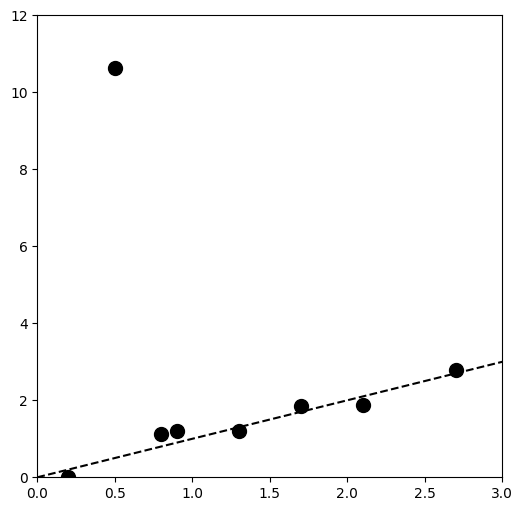

In [44]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x)) / 5
y[1] = y[1] + 10
plt.figure(figsize=(6, 6));
axes = plt.gca()
axes.set_xlim([0, 3])
axes.set_ylim([0, 12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [41]:
# lr = lm.LinearRegression()
# lr.fit(x[:, np.newaxis], y)
# 
# f_lr = lambda x: lr.coef_ * x + lr.intercept_

Estimates for squared error: -1.1650, 5.2692
Estimates for absolute error: 0.8283, 0.4536


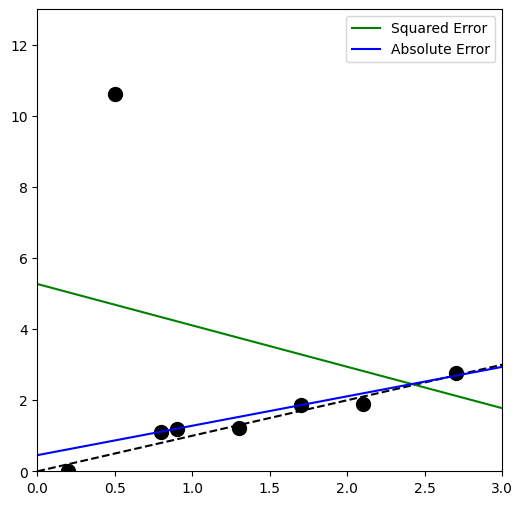

In [45]:
from scipy import optimize

x0 = np.array([2,2])

# ptymalizacja dla błędu kwadratowego
a_sq, b_sq = optimize.fmin_cg(compute_sq_error, x0, disp=0)
print(f"Estimates for squared error: {a_sq:.4f}, {b_sq:.4f}")

# Optymalizacja dla błędu bezwzględnego
a_abs, b_abs = optimize.minimize(compute_abs_error, x0, method="Nelder-Mead").x
print(f"Estimates for absolute error: {a_abs:.4f}, {b_abs:.4f}")

# Definicja funkcji regresji dla błędu kwadratowego i bezwzględnego
f_lr_sq = lambda x: a_sq * x + b_sq
f_lr_abs = lambda x: a_abs * x + b_abs

# Generowanie danych do wykresu
x_f_lr = np.linspace(0., 3, 200)
y_f_lr_sq = f_lr_sq(x_f_lr)
y_f_lr_abs = f_lr_abs(x_f_lr)

# Rysowanie wykresu
plt.figure(figsize=(6, 6))
axes = plt.gca()
axes.set_xlim([0, 3])
axes.set_ylim([0, 13])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x, y, 'ok', ms=10)
plt.plot(x_f_lr, y_f_lr_sq, 'g', label='Squared Error')
plt.plot(x_f_lr, y_f_lr_abs, 'b', label='Absolute Error')
plt.legend()
plt.show()